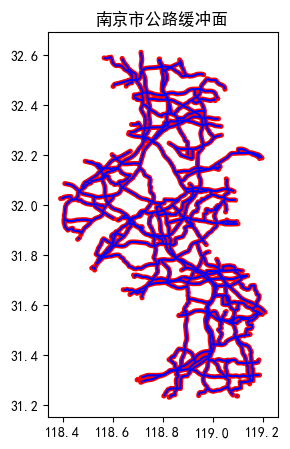

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import MultiLineString

# import matplotlib
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取GeoJSON文件
gdf = gpd.read_file("南京市公路投影.json")

# 合并所有线
merged_line = gdf.unary_union

# 将MultiLineString对象转换为面Polygon对象
buffer_distance = 0.01  # 缓冲距离
polygon = merged_line.buffer(buffer_distance)

# 将面Polygon转换为GeoDataFrame对象
output = gpd.GeoDataFrame({'geometry': [polygon]}, crs=gdf.crs)

# 绘制转换前的线矢量
fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax, color='blue')


output.plot(ax=ax, color='red')
ax.set_aspect('equal', adjustable='box')

plt.title('南京市公路缓冲面')
# 显示图形
plt.show()

# # 将面Polygon转换为GeoDataFrame对象并写入输出文件
# output = gpd.GeoDataFrame({'geometry': [polygon]}, crs=gdf.crs)
# output.to_file("output.json", driver='GeoJSON')


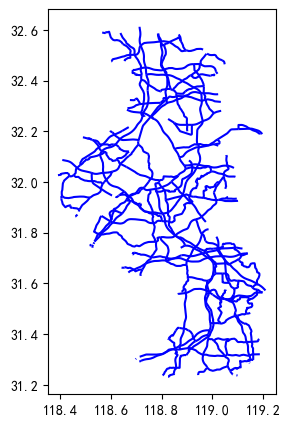

In [8]:
import matplotlib.pyplot as plt
import geopandas as gpd

# 设置全局参数
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取GeoJSON文件
gdf = gpd.read_file("南京市公路投影.json")

# 绘制图形
fig, ax = plt.subplots()
gdf.plot(ax=ax, color='blue')
ax.set_aspect('equal', adjustable='box')


In [17]:
gdf

,GB,RN,NAME,RTEG,TYPE,SHAPE_Leng,geometry
0,420101,G235,新沂-海丰,一级,,0.043889,"MULTILINESTRING ((119.09967 31.23645, 119.0990..."
1,420201,S453,高乌路,三级,,0.010370,"LINESTRING (118.71395 31.31089, 118.71406 31.3..."
2,420101,G235,新沂-海丰,二级,,0.047825,"LINESTRING (119.06128 31.27503, 119.06129 31.2..."
3,420201,S269,固城-砖墙,一级,,0.055788,"LINESTRING (118.97991 31.26843, 118.97998 31.2..."
4,420101,G235,新沂-海丰,一级,,0.085237,"LINESTRING (118.96424 31.31892, 118.97399 31.3..."
...,...,...,...,...,...,...,...
548,420201,S356,江北沿江公路,一级,,0.101457,"LINESTRING (119.00698 32.27107, 119.00506 32.2..."
549,420400,Y135,龙池-李营,四级,,0.021381,"LINESTRING (118.79631 32.31207, 118.80457 32.3..."
550,420101,G205,山海关-深圳,一级,,0.009161,"LINESTRING (118.81685 32.32320, 118.81794 32.3..."
551,420301,X102,浦口-六合,二级,,0.015368,"LINESTRING (118.80780 32.32636, 118.80744 32.3..."


Text(0.5, 1.0, '公路缓冲面转为六边形网格')

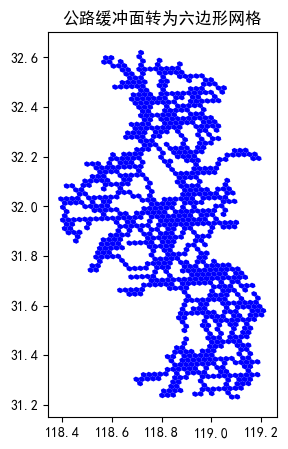

In [11]:
import h3pandas

# 绘制转换前的线矢量
fig, ax = plt.subplots(figsize=(5, 5))

gdf_h3 = output.h3.polyfill_resample(7)
gdf_h3.plot(ax=ax, color='blue', figsize=(5, 5))
ax.set_aspect('equal', adjustable='box')
plt.title('公路缓冲面转为六边形网格')
